In [1]:
from RCN import *
import numpy as np
import matplotlib.pyplot as plt
import json

In [171]:
# calibrated parameters from part_4.ipynb
r = -0.007801729853464256
delta = 0.02720239796079839
U = 1.054699999999994
D = 0.9440001342869291

### 1)
#### i)

In [314]:
payment_dates = np.arange(1,13)
period_length = 1/12
coupon_rate = 0.10
initial_price = 11118
exercise_price = 1

In [315]:
rcn1 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [316]:
rcn1.price_RCN()

1.0124083511877382

#### ii)

In [319]:
barrier_level = .8
rcn2 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)

In [318]:
rcn2.set_barrier()
rcn2.price_RCN()

1.0124083511877382

### 2)

In [8]:
par_rate1 = 0
rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)
while np.abs(rcn1_par.price_RCN() - 1) > .001:
    par_rate1 += .001
    rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                           payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [9]:
par_rate1

0.08700000000000006

In [10]:
round(rcn1_par.price_RCN(),2)

1.0

In [11]:
par_rate2 = 0
rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_par.set_barrier()
while np.abs(rcn2_par.price_RCN() - 1) > .001:
    par_rate2 += .001
    rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_par.set_barrier()

In [12]:
par_rate2

0.04500000000000003

In [13]:
round(rcn2_par.price_RCN(),2)

1.0

In [14]:
barrier_levels = np.arange(.4,1.2,.2)
strikes = np.linspace(.5,1.5)

In [15]:
par_simple = []
par_barrier = {}

In [16]:
for s in strikes:
    par = -.10
    simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                          payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    while np.abs(simple.price_RCN() - 1) > .001:
        par += .001
        simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                              payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    par_simple.append(par)

In [17]:
"""
for b in barrier_levels:
    for s in strikes:
        print(b,s)
        par = -.10
        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
        barrier.set_barrier()
        while np.abs(barrier.price_RCN() - 1) > .001:
            par += .001
            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
            barrier.set_barrier()
        if s == strikes[0]:
            par_barrier[b] = [par]
        else:
            par_barrier[b].append(par)
"""

'\nfor b in barrier_levels:\n    for s in strikes:\n        print(b,s)\n        par = -.10\n        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n        barrier.set_barrier()\n        while np.abs(barrier.price_RCN() - 1) > .001:\n            par += .001\n            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n            barrier.set_barrier()\n        if s == strikes[0]:\n            par_barrier[b] = [par]\n        else:\n            par_barrier[b].append(par)\n'

In [18]:
# block above takes more time to execute, save output to avoid running again
"""
with open('par_barrier.json', 'w') as f:
    json.dump(par_barrier, f)
"""
f = open('par_barrier.json',)
par_barrier = json.load(f)

In [19]:
tick_loc = list(range(0,len(strikes)+1,9))
tick_lab = [round(strikes[i],2) for i in tick_loc]

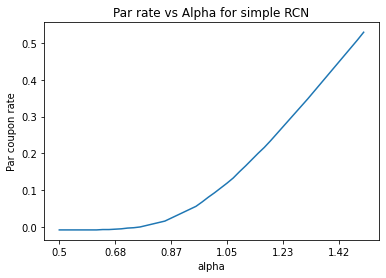

In [44]:
fig, ax = plt.subplots()
plt.plot(par_simple)
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for simple RCN');

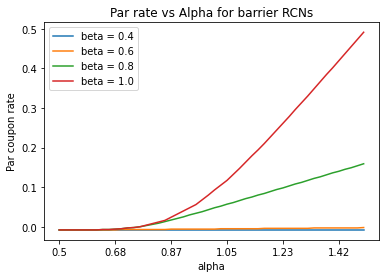

In [43]:
fig, ax = plt.subplots()
for i in range(len(par_barrier)):
    ax.plot(par_barrier[str(barrier_levels[i])], label = 'beta = '+str(round(barrier_levels[i],2)))
plt.legend()
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for barrier RCNs');

### 3)

In [120]:
a1 = 0
rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)
l = (rcn1_apar.price_RCN() - 1)**2
while np.sqrt(l) > .0001:
    grad = (rcn1_apar.price_RCN() - 1)*2
    a1 += .1 * grad
    rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)
    l = (rcn1_apar.price_RCN() - 1)**2

In [121]:
rcn1_apar.price_RCN()

1.0000996099062107

In [127]:
a1

1.0199301983798217

In [118]:
c_rates = np.linspace(0,.2,100)
a_pars = []
for c in c_rates:
    a_par = 0
    rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
    # pseudo gradient descent with early stopping
    l = (rcn1_apar_c.price_RCN()-1)**2
    lr = .1
    while np.sqrt(l) > .0001:
        grad_out = 2*(rcn1_apar_c.price_RCN()-1)
        a_par += lr*grad_out
        rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
        l = (rcn1_apar_c.price_RCN()-1)**2
    a_pars.append(a_par)

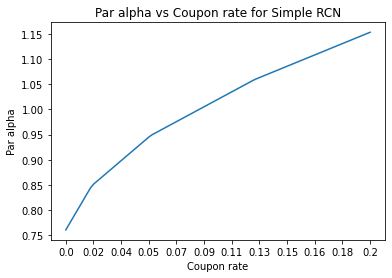

In [115]:
tick_loc = list(range(0,len(c_rates)+1,9))
tick_lab = [round(c_rates[i],2) for i in tick_loc]
fig, ax = plt.subplots()
plt.plot(a_pars)
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('Coupon rate');
plt.ylabel('Par alpha');
plt.title('Par alpha vs Coupon rate for Simple RCN');

### 4)

In [124]:
a2 = 0
rcn2_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a2, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_apar.set_barrier()
l = (rcn2_apar.price_RCN() - 1)**2
while np.sqrt(l) > .0001:
    grad = (rcn2_apar.price_RCN() - 1)*2
    a2 += .1 * grad
    rcn2_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a2, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_apar.set_barrier()
    l = (rcn2_apar.price_RCN() - 1)**2

In [125]:
rcn2_apar.price_RCN()

1.0000974476683058

In [126]:
a2

1.2392129118573822

In [381]:
c = 0.08080808
a_par = .99
b = 1
bar = RCN_binomial(r, period_length, initial_price, delta, U, D, payment_dates, c, a_par,
                   Simple=False, Callable=False, barrier_level=b)
bar.set_barrier()
bar.price_RCN()

0.9997457368329631

In [ ]:
[[0,.77],
[0.02020202,.87],
[0.04040404,.93],
[0.06060606,.96],
[0.08080808,.99]]

In [238]:
c_rates

array([0.        , 0.0020202 , 0.0040404 , 0.00606061, 0.00808081,
       0.01010101, 0.01212121, 0.01414141, 0.01616162, 0.01818182,
       0.02020202, 0.02222222, 0.02424242, 0.02626263, 0.02828283,
       0.03030303, 0.03232323, 0.03434343, 0.03636364, 0.03838384,
       0.04040404, 0.04242424, 0.04444444, 0.04646465, 0.04848485,
       0.05050505, 0.05252525, 0.05454545, 0.05656566, 0.05858586,
       0.06060606, 0.06262626, 0.06464646, 0.06666667, 0.06868687,
       0.07070707, 0.07272727, 0.07474747, 0.07676768, 0.07878788,
       0.08080808, 0.08282828, 0.08484848, 0.08686869, 0.08888889,
       0.09090909, 0.09292929, 0.09494949, 0.0969697 , 0.0989899 ,
       0.1010101 , 0.1030303 , 0.10505051, 0.10707071, 0.10909091,
       0.11111111, 0.11313131, 0.11515152, 0.11717172, 0.11919192,
       0.12121212, 0.12323232, 0.12525253, 0.12727273, 0.12929293,
       0.13131313, 0.13333333, 0.13535354, 0.13737374, 0.13939394,
       0.14141414, 0.14343434, 0.14545455, 0.14747475, 0.14949

In [308]:
a_par

2.358452721562

In [383]:
a_pars2 = {}
bar = np.delete(barrier_levels, 0)
b = barrier_levels[3]
#for b in bar:
for c in c_rates:
    print(b,c)
    a_par = .7
    rcn2_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=False, Callable=False, barrier_level=b)
    rcn2_apar_c.set_barrier()
    # pseudo gradient descent with early stopping
    l = (rcn2_apar_c.price_RCN()-1)**2
    lr = .1
    while np.sqrt(l) > .0001:
        print(a_par)
        grad = (rcn2_apar_c.price_RCN()-1)*2
        a_par += lr*grad
        rcn2_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=False, Callable=False, barrier_level=b)
        rcn2_apar_c.set_barrier()
        l = (rcn2_apar_c.price_RCN()-1)**2
    if c == c_rates[0]:
        a_pars2[b] = [a_par]
    else:
        a_pars2[b].append(a_par)

1.0000000000000002 0.0
0.7
0.7009465437908143
0.701879160176937
0.7027980540856025
0.7037034274287548
0.7045954791474144
0.705474405255392
0.7063403988823594
0.707193650316287
0.7080343470452559
0.7088626737986559
0.7096788125877761
0.7104829427457997
0.711275240967209
0.7120558813466111
0.7128250354169929
0.713582872187412
0.7143295581801341
0.7150652574672233
0.7157901317065946
0.7165043401775351
0.7172080398157036
0.7179013852476143
0.7185845288246133
0.7192576206563559
0.7199208086437899
0.7205742385116554
0.7212180538405045
0.7218523960982516
0.722477404671258
0.7230932168949601
0.7236999680840468
0.7242977915621923
0.7248868186913521
0.7254671789006272
0.7260389997147048
0.726602406781879
0.7271575239016607
0.7277044730519796
0.7282433744159876
0.7287743464084672
0.7292975057018501
0.7298129672518557
0.7303208443227495
0.7308212485122312
0.7313142897759571
0.7318000764517008
0.732278715283158
0.7327503114434029
0.7332149685579971
0.7336727887277603
0.7341238725512054
0.7345683191

0.7747902952613627
0.7750727476857591
0.7753441637947114
0.7756049748121996
0.7758555951129098
0.7760964228805899
0.7763278407406812
0.7765502163682307
0.7767639030720511
0.7769692403560547
0.7771665544586551
0.7773561588710927
0.7775383548355067
0.7777134318235472
0.7778816679962854
0.7780433306461536
0.778198676621618
0.7783479527352575
0.7784913961558978
0.7786292347854235
0.778761687620867
0.7788889651023494
0.7790112694474264
0.7791287949723699
0.7792417284008964
0.7793502491608327
0.7794545296691888
0.7795547356060932
0.7796510261780246
0.7797435543707575
0.779832467192425
0.7799179059070849
0.7800000062591581
0.780078898689099
0.7801547085406381
0.7802275562599273
0.780297557586904
0.7803648237391777
0.7804294615887317
0.780491573831721
0.7805512591516345
0.7806086123760833
0.7806637246274616
0.7807166834677217
0.7807675730374918
0.7808164741897575
0.7808634646183212
0.7809086189812411
0.7809520090194471
0.7809937036707226
0.7810337691792326
0.7810722692007716
0.7811092649038993

0.8087249470745639
0.8088987220816763
0.8090657071460262
0.8092261675722939
0.8093803582988613
0.8095285243028562
0.8096709009893698
0.8098077145654672
0.8099391823995832
0.8100655133668758
0.8101869081810859
0.8103035597134289
0.8104156532990285
0.8105233670313747
0.8106268720452778
0.8107263327887665
0.8108219072843613
0.8109137473801398
0.8110019989909916
0.8110868023304473
0.8111682921334483
0.8112465978704131
0.8113218439529385
0.8113941499314642
0.8114636306852138
0.8115303966047136
0.8115945537671808
0.811656204105058
0.8117154455679627
0.8117723722783091
0.8118270746808489
0.8118796396863694
0.8119301508097769
0.8119786883027844
0.8120253292814148
0.8120701478485227
0.8121132152115281
0.8121545997955506
0.8121943673521222
0.8122325810636536
0.8122693016438173
0.8123045874340094
0.8123384944960419
0.8123710767012133
0.8124023858158993
0.8124324715837979
0.812461381804963
0.8124891624117477
0.8125158575417823
0.8125415096080991
0.8125661593665183
0.8125898459804005
0.812612607082

0.840090264481378
0.840255754146264
0.8404147776030856
0.840567587507178
0.8407144266418279
0.8408555283040061
0.8409911166750281
0.8411214071767317
0.8412466068137374
0.8413669145023365
0.8414825213865272
0.8415936111417036
0.841700360266477
0.8418029383630962
0.8419015084069101
0.8419962270053022
0.8420872446465064
0.8421747059387027
0.8422587498397688
0.8423395098780558
0.8424171143645373
0.8424916865966682
0.8425633450542797
0.8426322035878185
0.8426983715992322
0.8427619542157858
0.8428230524570873
0.8428817633955873
0.8429381803108064
0.8429923928375375
0.8430444871082567
0.8430945458899703
0.843142648715714
0.8431888720109144
0.8432332892148137
0.8432759708971488
0.8433169848702726
0.8433563962968933
0.8433942677936047
0.8434306595303709
0.8434656293261239
0.8434992327406261
0.843531523162743
0.8435625518952672
0.8435923682364278
0.8436210195582151
0.8436485513816451
0.8436750074490826
0.8437004297937392
0.8437248588064548
0.8437483332998708
0.8437708905700949
0.8437925664559576

0.8636221202059489
0.8638994910141296
0.864155213600414
0.8643909775640587
0.8646083406345683
0.8648087389638591
0.86499349661514
0.8651638343112058
0.8653208774999442
0.8654656637903472
0.8655991498081558
0.8657222175164367
0.8658356800428508
0.8659402870521151
0.8660367296991549
0.8661256451956735
0.8662076210203092
0.8662831988001995
0.8663528778895959
0.8664171186691764
0.8664763455878525
0.8665309499671701
0.8665812925868319
0.8666277060684262
0.8666704970731091
0.8667099483277634
0.8667463204930195
0.8667798538854808
0.8668107700655338
0.8668392733012311
0.8668655519179241
0.866889779542557
0.8669121162508475
1.0000000000000002 0.026262626262626262
0.7
0.7062213261361131
0.7123511119466145
0.7183907043519243
0.7243414304539336
0.7302045978276129
0.7359814948083311
0.7416733907749454
0.7472815364287273
0.7528071640681835
0.7582514878598332
0.7636157041050018
0.7687980607506959
0.773777926223557
0.7785632124983639
0.783161522403852
0.7875801617020334
0.7918261506955396
0.7959062353

0.8599960452797255
0.8625851862289279
0.8649722500447917
0.867173008432535
0.8692020021481762
0.8710726370715915
0.8727972727812665
0.8743873042159708
0.8758532369629068
0.8772047566697729
0.8784507930393576
0.879599578829487
0.8806587042481482
0.8816351671031838
0.8825354190379071
0.8833654081581215
0.884130618332189
0.8848361054238092
0.8854865306969039
0.8860861916133195
0.8866390502268315
0.8871487593610561
0.8876186867442284
0.8880519372603116
0.8884513734634528
0.888819634491327
0.8891591535023341
0.8894721737518584
0.8897607634138088
0.8900268292453682
0.8902721291852379
0.8904982839686137
0.8907067878356386
0.890899018404081
0.8910762457714723
0.8912396409068397
0.8913902833874834
0.8915291685319121
0.8916572139760696
0.8917752657362986
0.8918841037991042
0.8919844472746465
0.8920769591480148
0.8921622506596736
0.8922408853440247
0.8923133827527672
0.8923802218876573
0.8924418443653478
0.8924986573352188
0.8925510361694776
0.8925993269433016
0.8926438487214113
0.892684895666181

0.8335252266777631
0.8396277681036604
0.8454918638078379
0.8511268306237654
0.8564369580011926
0.861332640843098
0.865846225694266
0.8700075345180956
0.8738440617349933
0.8773811558823222
0.8806421870961673
0.8836487015214906
0.8864205636708931
0.8889760876725663
0.891332158274611
0.8935043424052178
0.8955069920258044
0.8973533389566769
0.8990555823017427
0.9006249690499046
0.9020718683856815
0.9034058402000374
0.9046356982540813
0.9057695684129698
0.9068149423347738
0.9077787269690382
0.908667290192082
0.9094865028805565
0.9102417777012481
0.9109381048734175
0.9115800851399614
0.9121719601652424
0.9127176405604318
0.9132207317215307
0.9136845576507874
0.9141121829189015
0.9145064329131241
0.9148699125050339
0.9152050232613334
0.915513979311376
0.9157988219762669
0.9160614332561916
0.9163035482650863
0.9165267666948085
0.9167325633845513
0.9169222980653384
0.9170972243439797
0.9172584979858479
0.9174071845512027
0.9175442664355138
0.9176706493603021
0.9177871683573842
0.917894593286058

0.7577836487139805
0.76883528355765
0.7794942294503385
0.7897366963929018
0.7995789575438343
0.8090366502175209
0.8181248007286896
0.8268578482661142
0.8352496678334937
0.8433135922939603
0.8510624335532364
0.858406349430255
0.8651770877564864
0.87141938386254
0.8771744815783517
0.8824804057376399
0.8873722134139492
0.8918822255482368
0.8960402404984007
0.8998737309217071
0.9034080252909473
0.9066664752436331
0.9096706098699291
0.9124402779587306
0.9149937791417264
0.9173479848019369
0.9195184495455894
0.921519513973842
0.9233643994333863
0.9250652953719595
0.9266334398759382
0.9280791939221389
0.9294121098344178
0.9306409943973731
0.9317739670441532
0.9328185135028253
0.9337815352557558
0.934669395138787
0.9354879593814922
0.936242636366275
0.9369384123624005
0.9375798844710586
0.9381712909991331
0.9387165394623608
0.9392192324029005
0.9396826911918947
0.9401099779742899
0.9405039159009085
0.9408671077814501
0.9412019532816626
0.941510664778311
0.9417952819766979
0.942057685387316
0.9

0.9621292386182161
0.9622173164477248
0.9622946970787248
0.962362679703721
0.9624224057261331
0.9624748779240421
0.9625209772864673
0.9625614778048506
0.9625970594680887
0.9626283196792991
0.9626557832859995
0.9626799113921061
1.0000000000000002 0.06666666666666667
0.7
0.7143363758981112
0.7284618069768877
0.7423793970693428
0.7560922043388242
0.7696032419509954
0.782666696192963
0.7952197196885435
0.807282256592019
0.8188734717760688
0.830011781280783
0.8407148815729356
0.8509997776620047
0.8607830986312466
0.8698028514924627
0.8781186311682185
0.8857853813197731
0.8928537573684712
0.8993704611840607
0.9053785496512755
0.9109177191534288
0.9160245678526471
0.9207328374996708
0.9250736363708961
0.9290756448056385
0.9327653047016357
0.9361669942208147
0.939303188859634
0.9421946099482149
0.9448603615594214
0.9473180567324682
0.9495839338450335
0.9516014122391071
0.9533738645353683
0.9549310495598772
0.956299111879901
0.9575010207616407
0.9585569558158122
0.9594846458059341
0.96029966630

0.95706427791086
0.9606077710373835
0.9637209010452894
0.9664559362492754
0.9688587968905098
0.9709698261206926
0.9728244673488234
0.9744538593230808
0.9758853589390201
0.9771430005518482
0.978247899504461
0.9792186066463309
0.980071419795487
0.9808206573729221
0.9814788988036464
0.9820571957206338
0.9825652575176999
0.9830116143666742
0.9834037604358664
0.983748279714413
0.9840509565550474
0.9843168727912676
0.9845504930594627
0.9847557397585264
0.9849360589054992
0.9850944779929356
0.9852336568193969
0.9853559321464967
0.9854633569322744
0.9855577347996093
0.9856406503183902
0.9857134956098642
0.9857774937198437
0.9858337191531978
0.9858831159143971
0.9859265133570031
0.9859646401082113
0.9859981363022358
0.9860275643279282
0.9860534182710812
1.0000000000000002 0.0808080808080808
0.7
0.7171766433148105
0.7341005502374832
0.7507754395204392
0.7672049751985359
0.783202404774406
0.7985747638469131
0.8133464759106143
0.8275410101563792
0.8411809187590729
0.8542878727082908
0.866654832029

0.8448445571219061
0.860242875985233
0.8745795744597247
0.8877973230639301
0.8999834535370528
0.911218481555419
0.9215766387121861
0.9311263629771274
0.9399307508770375
0.9480479743843866
0.9555267799483012
0.9620972721696757
0.9678697672107883
0.972941183153002
0.9773966672159181
0.9813110253480641
0.9847499781914213
0.9877712645069763
0.9904256105874096
0.9927575819330043
0.9948063314901031
0.9966062570147635
0.9981875785985063
0.9995768460526043
1.000797384669707
1.0018696868469763
1.0028117561459438
1.0036394095657262
1.0043665431046582
1.0050053650690247
1.0055666010460589
1.006059673982632
1.0064928623930856
1.006873439352461
1.0072077946087705
1.0075015418645297
1.0077596130287714
1.0079863410219942
1.0081855325243148
1.008360531888234
1.0085142772890938
1.0086493500559666
1.0087680180112266
1.0088722735464588
1.0089638670739844
1.009044336415645
1.009115032622268
1.0091771426573168
1.0092317093255727
1.0092796487814468
1.0093217659108769
1.0093587678450684
1.0093912758329688
1.

1.0294499176595546
1.0294768371013068
1.0295004871322007
1.0000000000000002 0.10707070707070707
0.7
0.7224514256601092
0.7445725020071609
0.7663680897867612
0.7876730014852983
0.8081454624569014
0.8278179992016836
0.8467218673058465
0.8648871011003326
0.8817015947599031
0.8972037517240494
0.9114959971764868
0.9246727622257086
0.9368211078261395
0.9480213000035225
0.9583436126319432
0.967412263267665
0.9753795112394367
0.982379123727943
0.9885286216678646
0.993931252881406
0.9986777255714847
1.0028477312792952
1.0065112828761513
1.0097298900539997
1.0125575920506595
1.01504186494887
1.017224418782362
1.0191418978320759
1.0208264958702418
1.0223064966820448
1.0236067489400391
1.0247490834042747
1.0257526794527778
1.0266343870962962
1.0274090098838196
1.0280895534487544
1.028687443868755
1.029212719505389
1.0296741995445593
1.03007963206741
1.030435824137777
1.0307487560903006
1.0310236819380585
1.031265217585524
1.0314774183279145
1.0316638469381159
1.0318276334843366
1.0319715278828085


1.0522706922721847
1.052366258195902
1.0524502174796466
1.0525239797690982
1.0525887835061294
1.0526457167217933
1.0526957353039668
1.0527396790463581
1.0527782857483365
1.0528122036023138
1.0528420020766582
1.0528681814768601
1.0528911813454778
1.0000000000000002 0.12121212121212122
0.7
0.7252916930768085
0.7502112452677563
0.7747641322378576
0.79858125124467
0.8214677595870855
0.8434600191864784
0.8645929711881922
0.8842706885000013
0.9024126003910049
0.9191385733199593
0.9345591184147046
0.9487761216365278
0.9618470273421245
0.9733304498660801
0.9834191916743259
0.9922826390534604
1.0000696060445746
1.0069108329765977
1.012921181548621
1.0182015633158343
1.0228406339576446
1.026916281774121
1.0304969354020788
1.033642712706873
1.036406430139381
1.0388344895049015
1.040967657032503
1.0428417478251053
1.0444882271819635
1.0459347388895401
1.0472055693505722
1.0483220553438952
1.0493029422611588
1.0501646988350997
1.0509217936435429
1.0515869380315348
1.0521712995301782
1.0526846893553

0.9852216410578581
0.9967064453859275
1.006796401175885
1.0156609150966385
1.0234488190961228
1.030290869235295
1.0363019410345935
1.0415829581919298
1.0462225870546784
1.0502987252952343
1.0538798097844533
1.057025965621694
1.0597900156132547
1.0621958510164227
1.0642313546658728
1.0659535319609068
1.0674106134239305
1.068643405422762
1.0696864329754077
1.0705689066421813
1.0713155405835124
1.0719472446936031
1.072481710193516
1.072933905083551
1.0733164933303267
1.0736401895281311
1.0739140589670282
1.0741457715112919
1.0743418163981744
1.0745076839725645
1.0746480194471162
1.0747667529939835
1.0748672098114542
1.0749522032479564
1.0750241135914287
1.0750849547305932
1.0751364305550168
1.0751799826734765
1.0752168307870045
1.075248006847288
1.0752743839570436
1.0000000000000002 0.13737373737373737
0.7
0.7285377129816077
0.7566555232798656
0.784359609324825
0.8110478223982379
0.8366932420215819
0.8613366134548156
0.8845145027043938
0.9058834053023053
0.9255845089412977
0.9437479819046

1.0222420885284067
1.0324767180017067
1.0414683347469573
1.0493679047220492
1.0563080588188454
1.062405319687367
1.0676545995976174
1.072095854556386
1.0758534643516395
1.0790326629125124
1.0817224854433731
1.0839982619036959
1.085923726665009
1.087552803427027
1.0889311153805195
1.0900972629098644
1.0910839046180434
1.0919186719487814
1.0926249430203276
1.0932224973425146
1.0937280697528111
1.0941558190846503
1.0945177246933473
1.0948239219445346
1.0950829860606512
1.0953021722747631
1.0954876190173568
1.0956445198264608
1.095777268795535
1.095889583632475
1.0959846097760664
1.0960650084857282
1.0961330313715467
1.0961905834518542
1.0962392765043154
1.0962804742046472
1.0963153303171078
1.0963448210062987
1.0963697721751915
1.0000000000000002 0.15353535353535352
0.7
0.731783732886407
0.7630998012919749
0.7938647226533094
0.8234275605930512
0.8518352843374659
0.8790007527150021
0.904046012079885
0.9271365403909284
0.9484249003921302
0.9680305023101082
0.9852549713508586
1.0003875000524

1.1017402764116737
1.1041807216481672
1.1062455076175748
1.1079924597866753
1.1094705025118494
1.1107210291925915
1.1117790615164294
1.1126742302605472
1.1134316051179987
1.1140723967882493
1.1146145509944827
1.1150732510634482
1.1154613431428784
1.115789695964922
1.1160675052309663
1.1163025511423115
1.1165014162889884
1.1166696699988126
1.116812024309473
1.1169324659317397
1.1170343678994914
1.1171205840333849
1.1171935288636714
1.1172552452504456
1.117307461595065
1.117351640244982
1.1173890184475868
1.1174206430000029
1.1174473995652152
1.0000000000000002 0.1696969696969697
0.7
0.7350297527912062
0.7695440793040841
0.8033032221121134
0.8357432877341461
0.8669158167152875
0.8961503004189164
0.9231030927131693
0.9479522749262611
0.9708612978959199
0.9909879820214856
1.0086702469712743
1.0242049715093
1.0378529779811874
1.049843411425999
1.060377586837668
1.0695907693311504
1.0773857608604296
1.0839808644508033
1.0895607796058595
1.0942817749186657
1.0982760644596712
1.101655510504471

1.136966640167063
1.137230689024409
1.1374540926754042
1.1376431076621745
1.1378030274533892
1.137938330690763
1.1380528066158797
1.1381496611899884
1.1382316068787104
1.1383009386161314
1.1383595980756924
1.1384092280478237
1.1384512184471929
1.1384867452380303
1.1385168033676545
1.1385422346305185
1.0000000000000002 0.18585858585858586
0.7
0.7382757726960055
0.7759883573161935
0.8127417215709175
0.848059014875241
0.8819963490931093
0.9132998481228309
0.9421601733464539
0.9687680094615941
0.9923949468449236
1.013152353487651
1.0313887386585685
1.0474102845976214
1.0614859872037794
1.0737745728379786
1.0841715687721378
1.092968148596108
1.1004106653662884
1.1067075508584747
1.1120351528143848
1.1165426736571629
1.1203563489873063
1.123582982880092
1.1263129389924498
1.1286226712468783
1.130576864965597
1.1322302484185742
1.1336291255188298
1.134812672588988
1.1358140355157413
1.1366612580186386
1.1373780670298754
1.137984537180082
1.1384976529993949
1.1389317845785654
1.139299090011256

1.159608261755901
1.1596330914950579


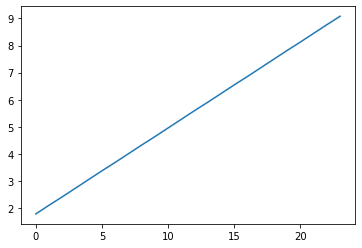

In [330]:
plt.plot(a_pars2[0.6000000000000001])